In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import nltk
from nltk.corpus import stopwords

In [2]:
df = pd.read_json('etsynecklaces10000.json')

In [3]:
len(df)

9967

In [4]:
df.head()

,cur,description,favorites,image_urls,images,overview,price,script,title
0,USD,[\n These beautiful high-quality Italian ch...,3737.0,[https://i.etsystatic.com/9408646/r/il/89302d/...,[{'url': 'https://i.etsystatic.com/9408646/r/i...,"[\n Handmade item\n, \n Materials: Solid...",15.00,"[\n {\n ""@type"": ""Product"",\n ""@conte...","Sterling silver chain Necklace, Mens chain, Cu..."
1,USD,[\n Name necklace. Silver name necklace. Pe...,248.0,[https://i.etsystatic.com/7353734/r/il/d16bb4/...,[{'url': 'https://i.etsystatic.com/7353734/r/i...,"[\n Handmade item\n, \n Material: solid ...",26.00,"[\n {\n ""@type"": ""Product"",\n ""@conte...",Name necklace. Silver name necklace. Personali...
2,USD,[\n !!1 SALE !!! WAS $400 - NOW $300 !!! SA...,243.0,[https://i.etsystatic.com/6500161/r/il/eca1b4/...,[{'url': 'https://i.etsystatic.com/6500161/r/i...,"[\n Handmade item\n, \n Chain style: Bea...",300.00,"[\n {\n ""@type"": ""Product"",\n ""@conte...",SALE ! High fasion bead etnic embroidery neckl...
3,USD,"[\n Moonstone Mala Necklace, Moonstone Neck...",1265.0,[https://i.etsystatic.com/10730572/r/il/4a2401...,[{'url': 'https://i.etsystatic.com/10730572/r/...,"[\n Handmade item\n, \n Necklace length:...",176.00,"[\n {\n ""@type"": ""Product"",\n ""@conte...",Divine Feminine Moonstone Mala - Beaded Neckla...
4,USD,[\n Original Filigree Trancelim Double Neck...,NaN,[https://i.etsystatic.com/12491321/r/il/a79107...,[{'url': 'https://i.etsystatic.com/12491321/r/...,"[\n Handmade item\n, \n Material: Silver...",84.00,"[\n {\n ""@type"": ""Product"",\n ""@conte...",Portuguese Filigree NECKLACE Double Trancelim ...


In [5]:
usdf=df[df['cur']=='USD']
len(usdf)

8257

In [18]:
def text_cleanup(text):
    text = list(set([txt.strip() for txt in text]))
    text = ' '.join(text).strip()
    linkregex = r"((([A-Za-z]{3,9}:(?:\/\/)?)(?:[-;:&=\+\$,\w]+@)?[A-Za-z0-9.-]+|(?:www.|[-;:&=\+\$,\w]+@)[A-Za-z0-9.-]+)((?:\/[\+~%\/.\w\-_]*)?\??(?:[-\+=&;%@.\w_]*)#?(?:[\w]*))?)"
    text = re.sub(linkregex, '', text)
    text = re.sub(r"[^a-zA-Z\d\s]", '', text)
    text = text.lower()
    return text
    
def remove_stopwords(text):
    s=set(stopwords.words('english'))
    text = ' '.join([x for x in text.split() if not x in s])
    return text

def remove_numbers(text):
    text = ' '.join([x for x in text.split() if not bool(re.search(r'\d', x))])
    return text

In [7]:
usdf['price'] = pd.to_numeric(usdf['price'].apply(lambda x: x.replace(',','')))

/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
usdf['description'][0]

["\n    These beautiful high-quality Italian chains are created with the finest sterling silver metal from Italy and they won't wear down, as silver plating can, no allergy metals are used. Under the US and Canadian federal law the jewel, must be accompanied by Stamps Of Quality 925 or sterling or ster or sterling silver mark, just if the piece is solid 925 sterling silver.",
 'More Solid 925 sterling silver Curb Chains: ',
 'I have 300 CROSSES available: ',
 '  And, this link: ',
 ' 925 Sterling silver Italian chains link: ',
 'Need charms?................. ',
 'Classic Crosses .............. ',
 'Celtic Crosses ................ ',
 'FEATURE. Approx. Weight (g/pc): ',
 '~ Solid 925 Sterling Silver chain, select your length from the menu.',
 '~ Rolo chain size: 1mm.',
 '~ Cable chain size: 1.1 mm.',
 '~ Rope chain size: 1.1 mm.',
 'CURB 1.5mm: Approx. Weight (g/pc): ',
 '16" Weight(g/pc): 2.02 grams. Width Links: 1.5mm',
 '16" Weight(g/pc): 2.30 grams. Width Links: 1.5mm',
 '18" Weight

In [19]:
text_cleanup(usdf['description'][0])

'feature approx weight gpc i have 300 crosses available figaro 80 approx weight gpc  offered in this listing these beautiful highquality chains are created with the finest sterling silver metal from italy and it wont wear down as silver plating can under the us and canadian federal law the jewel must be accompanied by stamps of quality 925 or sterling or ster or sterling silver mark just if the piece is solid 925 sterling silver 16 inch weightgpc 950 grams width links 385mm more solid 925 sterling silver curb chains classic crosses  30 weightgpc 919 grams width links 21mm 24 weightgpc 735 grams width links 21mm 26 inch weightgpc 1544 grams width links 385mm care with proper care your fine quality silver will last a lifetime avoid exposing your jewelry with chemicals like bleach or ammonia or swimming in chlorinated water 925 sterling silver italian chains link 20 weightgpc 280 grams width links 15mm 16 weightgpc 490 grams width links 21mm 18 inch weightgpc 850 grams width links 3mm cle

In [7]:
tmp = usdf['description'][0].apply(lambda x: ''.join(x).strip())
linkregex = r"((([A-Za-z]{3,9}:(?:\/\/)?)(?:[-;:&=\+\$,\w]+@)?[A-Za-z0-9.-]+|(?:www.|[-;:&=\+\$,\w]+@)[A-Za-z0-9.-]+)((?:\/[\+~%\/.\w\-_]*)?\??(?:[-\+=&;%@.\w_]*)#?(?:[\w]*))?)"
usdf['description'] = tmp.str.replace(linkregex, '')
usdf['description'] = usdf['description'].str.replace(r"[^a-zA-Z\d\s]", '')
usdf['description'] = usdf['description'].str.lower()

/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [8]:

#nltk.download('stopwords')

In [9]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english", ignore_stopwords=True)

#usdf['desc'] = usdf['description'].apply(lambda desc: ' '.join([stemmer.stem(x) for x in desc.split()]))

In [10]:

s=set(stopwords.words('english'))

In [11]:
usdf['desc'] = usdf['description'].apply(lambda desc: ' '.join([x for x in desc.split() if not x in s]))

/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [12]:
import re
usdf['adesc'] = usdf['desc'].apply(lambda desc: ' '.join([x for x in desc.split() if not bool(re.search(r'\d', x))]))

/home/eli/anaconda3/envs/etsyapp/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    usdf['adesc'].values, usdf['price'].values, test_size=0.25, random_state=42)

In [14]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [28]:
import os
import tempfile
TEMP_FOLDER = "/home/eli/code/insight/etsy/etsyitems/nlp"
print('Folder "{}" will be used to save temporary dictionary and corpus.'.format(TEMP_FOLDER))

Folder "/home/eli/code/insight/etsy/etsyitems/nlp" will be used to save temporary dictionary and corpus.


In [16]:
texts = [text.split() for text in X_train]

## TFIDF ##

In [21]:
from gensim import corpora
dictionary = corpora.Dictionary(texts)
dictionary.save(os.path.join(TEMP_FOLDER, 'necklaces.dict'))  # store the dictionary, for future reference
print(dictionary)

2019-01-28 11:10:14,190 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2019-01-28 11:10:15,329 : INFO : built Dictionary(36127 unique tokens: ['alone', 'announcements', 'around', 'available', 'bracelet']...) from 6192 documents (total 1451014 corpus positions)
2019-01-28 11:10:15,330 : INFO : saving Dictionary object under ~/code/insight/etsy/etsyitems/nlp/necklaces.dict, separately None
2019-01-28 11:10:15,354 : INFO : saved ~/code/insight/etsy/etsyitems/nlp/necklaces.dict


Dictionary(36127 unique tokens: ['alone', 'announcements', 'around', 'available', 'bracelet']...)


In [22]:
corpus = [dictionary.doc2bow(text) for text in texts]
corpora.MmCorpus.serialize(os.path.join(TEMP_FOLDER, 'necklaces.mm'), corpus)

2019-01-28 11:10:43,143 : INFO : storing corpus in Matrix Market format to ~/code/insight/etsy/etsyitems/nlp/necklaces.mm
2019-01-28 11:10:43,144 : INFO : saving sparse matrix to ~/code/insight/etsy/etsyitems/nlp/necklaces.mm
2019-01-28 11:10:43,145 : INFO : PROGRESS: saving document #0
2019-01-28 11:10:43,300 : INFO : PROGRESS: saving document #1000
2019-01-28 11:10:43,440 : INFO : PROGRESS: saving document #2000
2019-01-28 11:10:43,583 : INFO : PROGRESS: saving document #3000
2019-01-28 11:10:43,722 : INFO : PROGRESS: saving document #4000
2019-01-28 11:10:43,866 : INFO : PROGRESS: saving document #5000
2019-01-28 11:10:44,007 : INFO : PROGRESS: saving document #6000
2019-01-28 11:10:44,039 : INFO : saved 6192x36127 matrix, density=0.251% (561046/223698384)
2019-01-28 11:10:44,040 : INFO : saving MmCorpus index to ~/code/insight/etsy/etsyitems/nlp/necklaces.mm.index


In [23]:
from gensim import models
tfidf = models.TfidfModel(corpus) # step 1 -- initialize a model
tfidf.save(os.path.join(TEMP_FOLDER, 'necklacesmodel.tfidf'))

2019-01-28 11:11:06,808 : INFO : collecting document frequencies
2019-01-28 11:11:06,809 : INFO : PROGRESS: processing document #0
2019-01-28 11:11:06,979 : INFO : calculating IDF weights for 6192 documents and 36126 features (561046 matrix non-zeros)
2019-01-28 11:11:07,091 : INFO : saving TfidfModel object under ~/code/insight/etsy/etsyitems/nlp/necklacesmodel.tfidf, separately None
2019-01-28 11:11:07,282 : INFO : saved ~/code/insight/etsy/etsyitems/nlp/necklacesmodel.tfidf


In [26]:
from gensim import similarities
index = similarities.MatrixSimilarity(tfidf[corpus]) # transform corpus to Tfidf space and index it

2019-01-28 11:14:24,102 : WARNING : scanning corpus to determine the number of features (consider setting `num_features` explicitly)
2019-01-28 11:14:27,637 : INFO : creating matrix with 6192 documents and 36127 features


In [29]:
index.save(os.path.join(TEMP_FOLDER, 'necklacestfidfsim.index'))

2019-01-28 11:21:11,838 : INFO : saving MatrixSimilarity object under /home/eli/code/insight/etsy/etsyitems/nlp/necklacestfidfsim.index, separately None
2019-01-28 11:21:11,840 : INFO : storing np array 'index' to /home/eli/code/insight/etsy/etsyitems/nlp/necklacestfidfsim.index.index.npy
2019-01-28 11:21:22,631 : INFO : saved /home/eli/code/insight/etsy/etsyitems/nlp/necklacestfidfsim.index


In [30]:
docs_test = [text.split() for text in X_test]

In [33]:
corpus_test = [dictionary.doc2bow(text) for text in docs_test]
corpora.MmCorpus.serialize(os.path.join(TEMP_FOLDER, 'necklaces-test.mm'), corpus_test)

2019-01-28 11:29:28,504 : INFO : storing corpus in Matrix Market format to /home/eli/code/insight/etsy/etsyitems/nlp/necklaces-test.mm
2019-01-28 11:29:28,505 : INFO : saving sparse matrix to /home/eli/code/insight/etsy/etsyitems/nlp/necklaces-test.mm
2019-01-28 11:29:28,508 : INFO : PROGRESS: saving document #0
2019-01-28 11:29:28,646 : INFO : PROGRESS: saving document #1000
2019-01-28 11:29:28,794 : INFO : PROGRESS: saving document #2000
2019-01-28 11:29:28,803 : INFO : saved 2065x36127 matrix, density=0.235% (175141/74602255)
2019-01-28 11:29:28,805 : INFO : saving MmCorpus index to /home/eli/code/insight/etsy/etsyitems/nlp/necklaces-test.mm.index


In [58]:
import re
from collections import Counter

def viterbi_segment(text):
    probs, lasts = [1.0], [0]
    for i in range(1, len(text) + 1):
        #(log(1/total)-max_word_len-1)*(j-i) 
        prob_k, k = max((probs[j] * word_prob(text[j:i]), j)
                        for j in range(max(0, i - max_word_length), i))
        probs.append(prob_k)
        lasts.append(k)
    words = []
    i = len(text)
    while 0 < i:
        words.append(text[lasts[i]:i])
        i = lasts[i]
    words.reverse()
    return words, probs[-1]

def word_prob(word): return dictionary_US[word] / total
def words(text): return re.findall('[a-z]+', text.lower()) 
dictionary_US = Counter(words(open('/home/eli/Downloads/big.txt').read()))
max_word_length = max(map(len, dictionary_US))
total = float(sum(dictionary_US.values()))

In [62]:
with open('/usr/share/dict/american-english') as fdict:
    US_dict = fdict.readlines()
# you may also want to remove whitespace characters like `\n` at the end of each line
US_dict = [x.strip() for x in US_dict] 

In [66]:
'necklac' in US_dict

False

In [32]:
def vec_normalize(vec):
    return vec/np.sqrt(np.sum(np.square(vec)))

assert(np.array_equal(vec_normalize([1,0]),[1,0]))
#vec_normalize([1,1])

In [ ]:
%%time
knn=10
y_pred = np.zeros(len(testvecs))
for i in range(len(testvecs[:1])):
    sims = sorted(enumerate(index[vec]), key=lambda item: -item[1])[:knn]
    y_pred[i] = np.average([y_train[k] for (k,v) in sims], weights=np.square(vec_normalize([v for (k,v) in sims])))

In [46]:
import gensim
trainvecs = tfidf[corpus]
trainvecs = gensim.matutils.corpus2csc(trainvecs)
trainvecs.T.toarray().shape

(6192, 36127)

In [55]:
y_train

array([  48.  , 2277.77,   54.  , ...,   78.  ,  695.  ,   25.35])

In [53]:
testvecs = [tfidf[dictionary.doc2bow(doc)] for doc in docs_test]
testvecs = gensim.matutils.corpus2csc(testvecs)
testvecs.T.toarray().shape

(2065, 36127)

In [54]:
from sklearn import neighbors
n_neighbors = 10


knn = neighbors.KNeighborsRegressor(n_neighbors, weights='distance')
y_ = knn.fit(trainvecs, y_train).predict(testvecs)


ValueError: Found input variables with inconsistent numbers of samples: [36127, 6192]

In [ ]:
sorted(enumerate(index[testvecs[0]]), key=lambda item: -item[1])[:5]

In [ ]:
np.square(vec_normalize([v for (k,v) in sorted(enumerate(index[testvecs[0]]), key=lambda item: -item[1])[:5]]))

In [ ]:
from sqlalchemy import create_engine
from sqlalchemy_utils import database_exists, create_database
import psycopg2

# Define a database name (we're using a dataset on births, so we'll call it birth_db)
# Set your postgres username/password, and connection specifics
username = 'eli'
password = 'elipgsql'     # change this
host     = 'localhost'
port     = '5432'            # default port that postgres listens on
db_name  = 'necklaces_train'

## 'engine' is a connection to a database
## Here, we're using postgres, but sqlalchemy can connect to other things too.
engine = create_engine( 'postgresql://{}:{}@{}:{}/{}'.format(username, password, host, port, db_name) )
print(engine.url)

In [ ]:
## create a database (if it doesn't exist)
if not database_exists(engine.url):
    create_database(engine.url)
print(database_exists(engine.url))

In [ ]:
traindf = pd.DataFrame({'desc' : X_train, 'price' : y_train})

In [ ]:
len(X_train)

In [ ]:
len(traindf)

In [ ]:
traindf.to_sql('necklaces_train',engine, if_exists='replace')

In [80]:
import psycopg2

In [82]:
db_name = 'necklaces_train'
username = 'eli'

In [110]:
sql_query = """
SELECT price FROM necklaces_train WHERE Index IN (%s) 
""" % items

In [111]:
sql_query

'\nSELECT price FROM necklaces_train WHERE Index IN (4707, 2595, 5091, 2230, 2886, 3381, 6190, 2818, 2659, 5978) \n'

In [172]:
# Connect to make queries using psycopg2
con = None
con = psycopg2.connect(database = db_name, host='/var/run/postgresql', user = username)

# query:
items = ', '.join(str(k) for k in l)

sql_query = """
SELECT index, price FROM necklaces_train WHERE index IN (%s) 
""" % items
traindata_from_sql = pd.read_sql_query(sql_query,con)
len(traindata_from_sql)

10

In [173]:
traindata_from_sql

,index,price
0,2613,190.0
1,2802,195.0
2,4063,345.0
3,4146,465.0
4,4348,190.0
5,4397,545.0
6,4451,345.0
7,4882,299.0
8,5595,190.0
9,5644,324.0


In [174]:
l

[5644, 4146, 2802, 4397, 4882, 4063, 4451, 2613, 4348, 5595]

In [141]:
sims

[(4707, 0.30933678),
 (2595, 0.1403069),
 (5091, 0.1403069),
 (2230, 0.09882733),
 (2886, 0.09367348),
 (3381, 0.08935348),
 (6190, 0.08868384),
 (2818, 0.07842557),
 (2659, 0.076600604),
 (5978, 0.076600604)]

In [175]:
weights = np.square(vec_normalize([v for (k,v) in sims]))

In [147]:
traindata_from_sql.head()

,index,price
0,2230,147.99
1,2595,2994.95
2,2659,16.00
3,2818,230.00
4,2886,145.00


In [161]:
weightindexer for k in traindata_from_sql['index']

[(4707, 0.510785),
 (2595, 0.10508315),
 (5091, 0.10508315),
 (2230, 0.052134976),
 (2886, 0.046839077),
 (3381, 0.042618483),
 (6190, 0.041982092),
 (2818, 0.032831475),
 (2659, 0.031321272),
 (5978, 0.031321272)]

In [177]:
np.average([traindata_from_sql.loc[traindata_from_sql['index']==k, 'price'].values[0] for (k,v) in weightindexer],weights=[v for (k,v) in weightindexer])

319.63284377113126

In [ ]:
np.average([traindata_from_sql[traindata_from_sql['index']==k, 'price'] for (k,v) in sims], weights=np.square(vec_normalize([v for (k,v) in sims])))

In [176]:
weightindexer = list(zip([k for (k,v) in sims],weights))

In [117]:
np.average(traindata_from_sql['price'].values,weights=np.square(vec_normalize([v for (k,v) in sims])))

1468.686737082253

In [180]:
%%time
knn=10
y_pred = np.zeros(len(testvecs))
for i in range(len(testvecs[:1])):
    sims = sorted(enumerate(index[vec]), key=lambda item: -item[1])[:knn]
    y_pred[i] = np.average([y_train[k] for (k,v) in sims], weights=np.square(vec_normalize([v for (k,v) in sims])))

CPU times: user 140 ms, sys: 0 ns, total: 140 ms
Wall time: 69.9 ms


In [182]:
y_pred

array([74.50098364,  0.        ,  0.        , ...,  0.        ,
        0.        ,  0.        ])

In [170]:
l = [k for (k,v) in sorted(enumerate(index[trainvecs[56]]), key=lambda item: -item[1])[1:knn+1]]

In [171]:
l

[5644, 4146, 2802, 4397, 4882, 4063, 4451, 2613, 4348, 5595]

In [102]:

placeholder= '?' # For SQLite. See DBAPI paramstyle.
items = ', '.join(str(k) for k in l)
'SELECT name FROM students WHERE id IN (%s)' % items

'SELECT name FROM students WHERE id IN (4707, 2595, 5091, 2230, 2886, 3381, 6190, 2818, 2659, 5978)'

In [178]:
text = 'gold necklace'
doc = text.split()
vec = tfidf[dictionary.doc2bow(doc)]

In [179]:
sims = sorted(enumerate(index[vec]), key=lambda item: -item[1])[:knn]

In [60]:
trainvecs = tfidf[corpus]

In [168]:
%%time
knn = 10
y_fit = np.zeros(len(y_train))
trainvecs = tfidf[corpus]
for i in range(len(trainvecs[:1])):
    sims = sorted(enumerate(index[]), key=lambda item: -item[1])[1:knn+1]
    print(list(sims))
    y_fit[i] = np.average([y_train[k] for (k,v) in sims], weights=np.square(vec_normalize([v for (k,v) in sims])))

[(5644, 1.0), (4146, 0.6819855), (2802, 0.54656833), (4397, 0.54495716), (4882, 0.5449512), (4063, 0.53976053), (4451, 0.53976053), (2613, 0.53262985), (4348, 0.53262985), (5595, 0.53262985)]
CPU times: user 388 ms, sys: 72 ms, total: 460 ms
Wall time: 3.93 s


In [130]:
[y_train[k] for (k,v) in sims]

[2176.55, 2994.95, 2994.95, 147.99, 145.0, 130.0, 695.0, 230.0, 16.0, 16.0]

In [133]:
np.square(vec_normalize([v for (k,v) in sims]))

array([0.510785  , 0.10508315, 0.10508315, 0.05213498, 0.04683908,
       0.04261848, 0.04198209, 0.03283148, 0.03132127, 0.03132127],
      dtype=float32)

In [131]:
traindata_from_sql['price'].values

array([ 147.99, 2994.95,   16.  ,  230.  ,  145.  ,  130.  , 2176.55,
       2994.95,   16.  ,  695.  ])

In [169]:
y_fit

array([319.63284377,   0.        ,   0.        , ...,   0.        ,
         0.        ,   0.        ])

In [71]:
resid = y_fit[~np.isnan(y_fit)]-y_train[~np.isnan(y_fit)]

In [73]:
len(resid)

6190

In [75]:
sstot = np.sum(np.square(y_train[~np.isnan(y_fit)]-np.mean(y_train[~np.isnan(y_fit)])))

In [74]:
ssresid = np.sum(np.square(resid))

In [76]:
r2 = 1-ssresid/sstot
r2

0.45097824251248175

In [77]:
rmse = np.sqrt(np.mean(np.square(resid)))
rmse

311.17851372207684

In [34]:
(y_test[abs(resid)>1000], y_pred[abs(resid)>1000])

(array([ 3200.,   520.,  5000.,  1000.,  4999.,  1100.,  1580.,  7485.,
         7485.,   119., 25000.,  1885.,  1325.,  2500.]),
 array([6365.42976368, 1763.52996869,  122.86463197, 2215.38900991,
         260.34977005, 2211.6671685 ,  413.5758831 ,  796.11269749,
         796.11269749, 1807.92748544,  152.59292633,  229.71432799,
          39.73430961,   43.5047984 ]))

In [ ]:
np.mean(test)

In [33]:
resid[abs(resid)>1000]

array([-3165.42976368, -1243.52996869,  4877.13536803, -1215.38900991,
        4738.65022995, -1111.6671685 ,  1166.4241169 ,  6688.88730251,
        6688.88730251, -1688.92748544, 24847.40707367,  1655.28567201,
        1285.26569039,  2456.4952016 ])

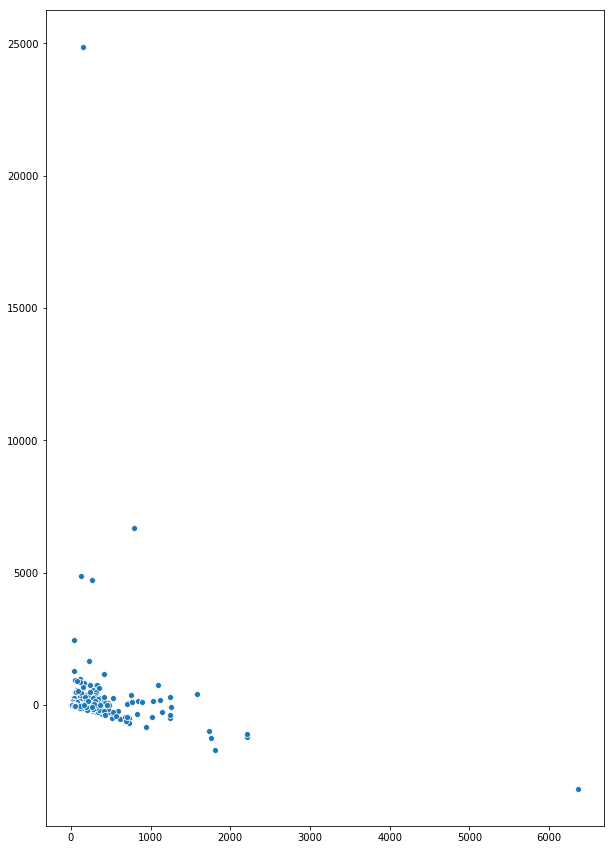

In [30]:
fig,ax = plt.subplots(figsize=(10,15))
sns.scatterplot(x=y_pred, y=resid, ax=ax)

In [ ]:
np.sort(np.square(y_test-y_pred))

In [ ]:
np.median(y_test)

In [ ]:
np.mean(y_test)

In [ ]:
np.sqrt(np.mean(np.sort(np.square(y_test-y_pred))[:-100]))

In [ ]:
y_test[:10]

In [ ]:
y_train[k] for (k,v) in sorted(enumerate(index[testvecs[0]]), key=lambda item: -item[1])[:5]:


In [ ]:
np.mean([y_train[k] for (k,v) in sorted(enumerate(index[testvecs[0]]), key=lambda item: -item[1])[:10]])

In [ ]:
y_test[0]

In [ ]:
[sorted(enumerate(index[vec]), key=lambda item: -item[1])[:5] for vec in testvecs[:3]]

In [ ]:
sims = index[testvecs[0]]
sims = sorted(enumerate(sims), key=lambda item: -item[1])
print(sims[:10])

In [ ]:
# remove words that appear only once
from collections import defaultdict
frequency = defaultdict(int)
for text in X_train:
    for token in text.split():
        frequency[token] += 1

texts = [[token for token in text.split() if frequency[token] > 1] for text in X_train]

from pprint import pprint  # pretty-printer
pprint(texts)

In [ ]:
from nltk.probability import FreqDist

In [ ]:
%%time
fdist = FreqDist(word for word in ' '.join(usdf['desc'].values).split() if not word.isnumeric())

In [ ]:
fdist.pprint(maxlen=20)

In [ ]:
import re
usdf['adesc'] = usdf['desc'].apply(lambda desc: ' '.join([x for x in desc.split() if not bool(re.search(r'\d', x))]))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
descs = usdf['adesc'].values

In [ ]:
vectorizer = TfidfVectorizer()
tfidf =  vectorizer.fit_transform(descs)
feature_names = vectorizer.get_feature_names()
denselist = tfidf.todense().tolist()

In [ ]:
vectorizer.inverse_transform(tfidf)

In [ ]:
usdf[usdf.price>100]

In [ ]:
tfidffeatures = pd.DataFrame(denselist, columns=feature_names)

In [ ]:
s = tfidffeatures.iloc[0]
s[s>0].sort_values(ascending=False)[:10]

In [ ]:
tfidf.shape

In [ ]:
from sklearn.decomposition import TruncatedSVD

X_reduced = TruncatedSVD(n_components=50, random_state=0).fit_transform(tfidf)

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
%%time
X_embedded = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(X_reduced)

In [ ]:
fig, ax =plt.subplots(figsize=(10,5))
ax.set_xlim(0,10000)
usdf.price.hist(ax=ax, bins=50)

In [ ]:
from matplotlib import cm
from matplotlib import colors
norm = cm.colors.Normalize(vmax=usdf.price.values.max(), vmin=usdf.price.values.min())
cmap = cm.jet

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(frameon=False)
plt.setp(ax, xticks=(), yticks=())
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                wspace=0.0, hspace=0.0)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1],
        c=usdf.price.values, marker="x", cmap=cmap, norm=norm)

In [ ]:
from scipy.cluster import  hierarchy

In [ ]:
#Clustering
X = tfidf.todense()
threshold = 0.1
Z = hierarchy.linkage(X,"average", metric="cosine")
#Clustering
maxclust = 20
C = hierarchy.fcluster(Z, maxclust, criterion="maxclust")
#C = hierarchy.fcluster(Z, threshold, criterion="distance")

In [ ]:
len(C)

In [ ]:
len(np.unique(C))

In [ ]:
usdf['clusters'] = C
usdf.head()

In [40]:
from nltk import FreqDist

In [41]:
fdist_hiprice = FreqDist(word for word in ' '.join(usdf[usdf['price']>100]['adesc'].values).split() if not word.isnumeric())
fdist_hiprice.pprint(maxlen=20)

FreqDist({'gold': 7759, 'necklace': 7620, 'jewelry': 4075, 'please': 4020, 'pendant': 3700, 'silver': 3277, 'chain': 3251, 'diamond': 3101, 'gift': 2800, 'made': 2740, 'shipping': 2401, 'sterling': 2172, 'order': 2116, 'us': 2050, 'item': 1860, 'solid': 1857, 'days': 1805, 'piece': 1786, 'free': 1767, 'white': 1715, ...})


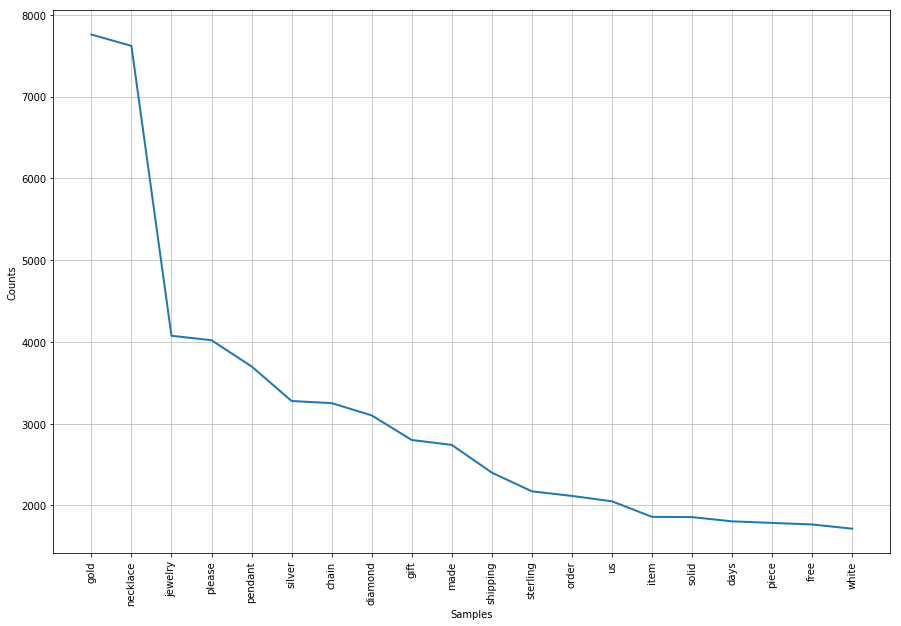

In [52]:
fig,ax = plt.subplots(figsize=(15,10)) 
plt.sca(ax)
fdist_hiprice.plot(20, cumulative=False)
fig.savefig('disthiprice.png')

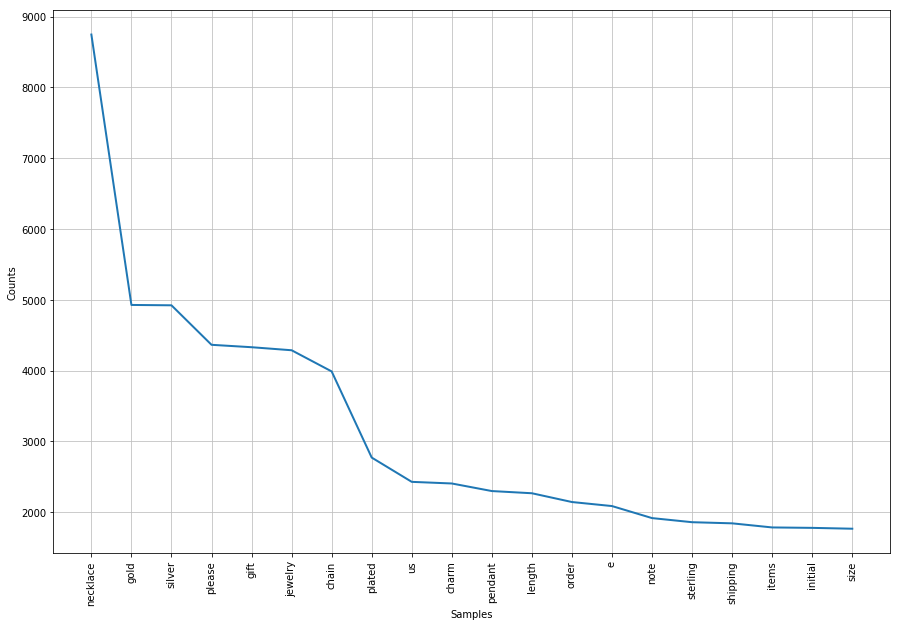

In [53]:
fig,ax = plt.subplots(figsize=(15,10)) 
plt.sca(ax)
fdist_loprice.plot(20,cumulative=False)
fig.savefig('distloprice.png')

In [42]:
fdist_loprice = FreqDist(word for word in ' '.join(usdf[usdf['price']<25]['desc'].values).split() if not word.isnumeric())
fdist_loprice.pprint(maxlen=20)

FreqDist({'necklace': 8747, 'gold': 4927, 'silver': 4922, 'please': 4364, 'gift': 4330, 'jewelry': 4287, 'chain': 3988, 'plated': 2771, 'us': 2428, 'charm': 2405, 'pendant': 2298, 'length': 2267, 'order': 2143, 'e': 2086, 'note': 1916, 'sterling': 1858, 'shipping': 1842, 'items': 1784, 'initial': 1778, 'size': 1766, ...})


In [ ]:
tfidf.shape

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [ ]:
y = usdf['price'].values

In [ ]:
y.shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [ ]:
regr_rf = RandomForestRegressor(n_estimators=20, max_depth=None,min_samples_split=2, random_state=2, oob_score=True)
regr_rf.fit(X_train, y_train)

In [ ]:
y_rf = regr_rf.predict(X_test)

In [ ]:
X!=tfidf

In [ ]:
regr_rf.score(X_test,y_test)

In [ ]:
regr_rf.oob_score_

In [ ]:
np.sqrt(np.mean(np.square(y_rf-y_test)))

In [ ]:
closeby = np.zeros(len(usdf))
eps = 1.0
for index, row in usdf.iterrows():
    if(index<len(usdf)-2):
        i2 = index+1
        row2=usdf.iloc[i2]
        while(row['clusters']==row2['clusters']):
            #print(row[['price','title']], row2[['price','title']])
            if (np.abs(float(row['price'])-float(row2['price']))<eps):
                closeby[i2]=1
            if(i2<len(usdf)-1): 
                i2+=1
                row2=usdf.iloc[i2]
        

In [ ]:
np.sum(closeby)

In [ ]:
len(C)

In [ ]:
len(np.unique(C))

In [ ]:
len(C)-len(np.unique(C))

In [ ]:
usdf.reset_index(drop=True)

In [ ]:
usdf.groupby('clusters')['price'].std()

### Lets have 20 clusters

In [ ]:
#Clustering
maxclust = 20
C20 = hierarchy.fcluster(Z, maxclust, criterion="maxclust")

In [ ]:
np.unique(C20)

In [ ]:
usdf['c20'] = C20
usdf.head()

In [ ]:
usdf['overview'].apply(lambda x: print(x))

In [ ]:
'vintage' in ' '.join(['\n    Vintage item\n', '\n    Favorited by: ', '\n', '\n        Gift wrapping and message available\n        ', '\n    ']).lower()

In [ ]:
import re
re.findall(r'\d{4}',' '.join(['\n    Vintage item \n', '\n    Favorited by: ', '\n', '\n        Gift wrapping and message available\n        ', '\n    ']))

In [ ]:
usdf['vintage'] = usdf['overview'].apply(lambda x: int('vintage' in ' '.join(x).lower()))

In [ ]:
usdf['year'] = usdf['overview'].apply(lambda x: re.findall(r'\d{4}',' '.join(x).lower())[0] if(len(re.findall(r'\d{4}',' '.join(x).lower()))>0) else np.nan)

In [ ]:
usdf['handmade'] = usdf['overview'].apply(lambda x: int('handmade' in ' '.join(x).lower() or 'hand-made' in ' '.join(x).lower()))

In [ ]:
def extract_materials(ov):
    l = [re.sub(r"[^a-zA-Z\d\s]", '', x).lower().replace('materials','').replace('material','').strip() for x in ov if 'materials' in x.lower() or 'material' in x.lower()] 
    return l[0] if len(l)>0 else np.nan
    
usdf['materials'] = usdf['overview'].apply(extract_materials)

In [ ]:
usdf.columns

In [ ]:
usdf.head()